<h1 align="center">Machine Learning for NLP</h1>
    <h2 align="center">Email Spam Detection</h2>
    <h3 align="center">Zahra Amini</h3>
<div style="width: 100%; text-align: center;">
    <table>
        <tr>
            <td>
                <a class="link" href="https://t.me/Zahraamini_ai">Telegram</a><br>
                <a class="link" href="https://www.linkedin.com/in/zahraamini-ai/">LinkedIn</a><br>
                <a class="link" href="https://www.youtube.com/@AcademyHobot">YouTube</a><br>
            </td>
            <td>
                <a class="link" href="https://github.com/aminizahra">GitHub</a><br>
                <a class="link" href="https://www.kaggle.com/aminizahra">Kaggle</a><br>
                <a class="link" href="https://www.instagram.com/zahraamini_ai/">Instagram</a><br>
            </td>
        </tr>
    </table>
</div>

Dataset: [Spam Email](https://spamassassin.apache.org/old/publiccorpus/)

## Libraries

In [4]:
import os
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from nltk.corpus import stopwords
import nltk

In [5]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Function to load emails and assign labels

In [7]:
def load_emails_from_folder(folder_path, label):
    emails = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="latin1") as file:
            content = file.read()
            emails.append((content, label))
    return emails

In [8]:
ham_emails = load_emails_from_folder(r"C:\PC\MyCourses\ML_NLP_Filoger\Session07&08\code\SpamData\20021010_easy_ham\easy_ham", 0)  # 0 برای non-spam (Ham)
spam_emails = load_emails_from_folder(r"C:\PC\MyCourses\ML_NLP_Filoger\Session07&08\code\SpamData\20021010_spam\spam", 1)     # 1 برای spam

In [9]:
emails = ham_emails + spam_emails
df = pd.DataFrame(emails, columns=["text", "label"])

## Text preprocessing function

In [11]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [12]:
df['text'] = df['text'].apply(preprocess_text)

## Split data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

### Transform text to TF-IDF features

In [16]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Train Logistic Regression model

In [18]:
model = LogisticRegression()#solver='liblinear', C=1.0)  # Default C and solver for simplicity
model.fit(X_train_tfidf, y_train)

LogisticRegression()

## Make predictions on the test set

In [20]:
y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

## Evaluate model

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 98.69%
Confusion Matrix:
[[518   1]
 [  7  85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       519
           1       0.99      0.92      0.96        92

    accuracy                           0.99       611
   macro avg       0.99      0.96      0.97       611
weighted avg       0.99      0.99      0.99       611



### Confusion Matrix

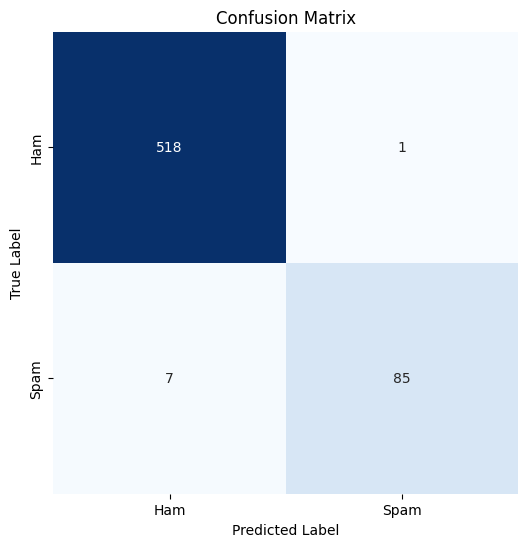

In [25]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### ROC and AUC Curve

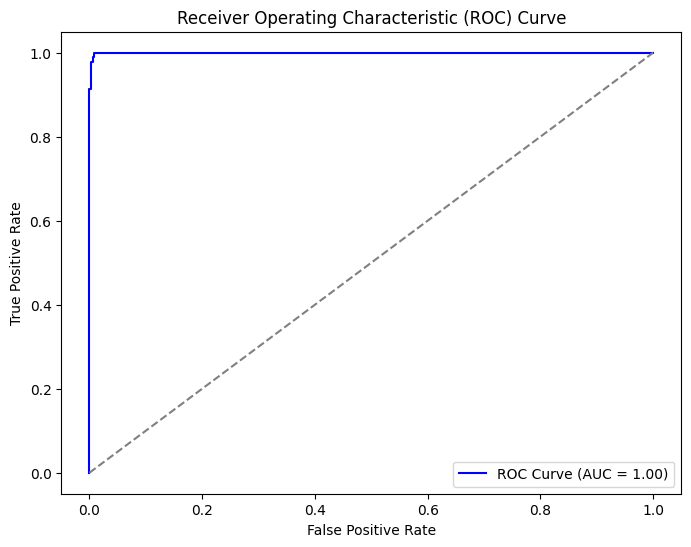

In [27]:
# ROC & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Optimal Threshold (Youden's Index): 0.27


C:\Users\Asus\AppData\Local\Temp\ipykernel_38188\3217198735.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="gray", linestyle="--")  # خط تصادفی
C:\Users\Asus\AppData\Local\Temp\ipykernel_38188\3217198735.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color="gray", linestyle="--")  # خط تصادفی


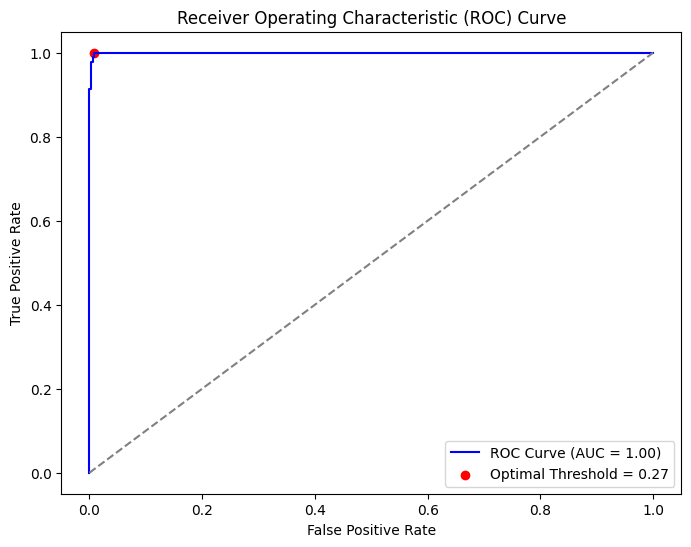

In [28]:
youden_index = tpr - fpr
optimal_index = youden_index.argmax()  
optimal_threshold = thresholds[optimal_index]

print(f"Optimal Threshold (Youden's Index): {optimal_threshold:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', color="gray", linestyle="--")  
plt.scatter(fpr[optimal_index], tpr[optimal_index], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")  # نقطه بهینه
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve

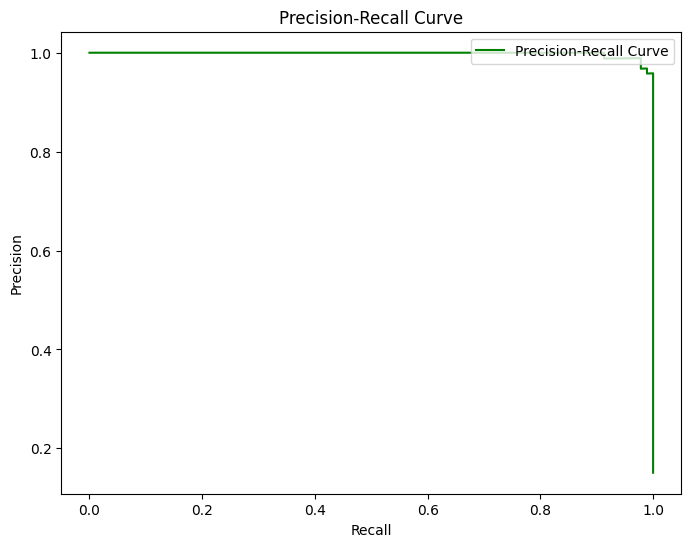

In [30]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()